In [1]:
from fastai.vision.all import *
# import torch
# torch.cuda.empty_cache()

In [2]:
path = Path("matrix/")
fnames = get_image_files(path)
print(f"Total Images: {len(fnames)}")
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func, num_workers=0, bs=32)

Total Images: 16662


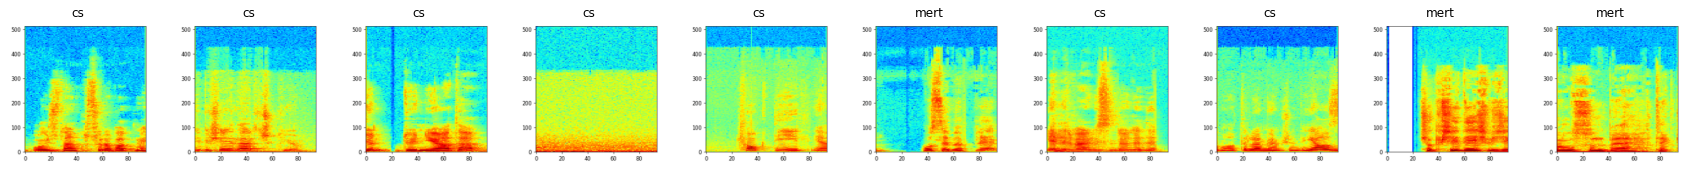

In [4]:
dls.valid.show_batch(max_n=10, nrows=1)
learn = cnn_learner(dls, resnet18, metrics= error_rate)
learn.model = learn.model.cuda()

ValueError: not enough values to unpack (expected 2, got 1)

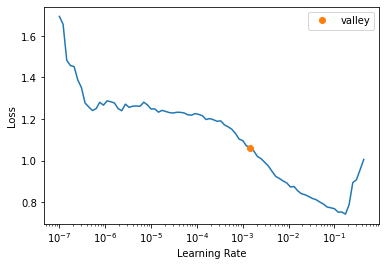

In [5]:
lr_min, lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [ ]:
learn.fine_tune(6, base_lr=1.0e-01)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix()
learn.export()
learn.save("modelim")

In [ ]:
listem = []
for i in range(0,880):
    listem.append(learn.predict("matrix/ortak/ortak{}.png".format(i))[0])

In [ ]:
import PIL
PIL.__version__

In [ ]:
!pip install pillow==8.2.0

In [ ]:
print("hello world")